In [42]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt

In [43]:
stadium_csv = "C:/Users/19033/OneDrive/Desktop/SMU bootcamp/Github/projects/smu_project1_nfl/Resources/stadiums_clean.csv"
game_csv = "C:/Users/19033/OneDrive/Desktop/SMU bootcamp/Github/projects/smu_project1_nfl/Resources/gamedata_clean.csv"

In [44]:
stadium_df = pd.read_csv(stadium_csv)
game_df = pd.read_csv(game_csv)

In [45]:
stadium_df.head()

,stadium_name,stadium_location,stadium_open,stadium_close,stadium_type,stadium_weather_type,stadium_surface,LATITUDE,LONGITUDE,ELEVATION
0,Arrowhead Stadium,"Kansas City, MO",1972,0,outdoor,cold,Grass,39.0692,-94.4871,264.9
1,AT&T Stadium,"Arlington, TX",2009,0,retractable,dome,FieldTurf,32.7572,-97.0736,163.4
2,Bank of America Stadium,"Charlotte, NC",1996,0,outdoor,moderate,Grass,35.2236,-80.9552,221.9
3,Candlestick Park,"San Francisco, CA",1960,2013,outdoor,moderate,NaN,37.6197,-122.3647,2.4
4,CenturyLink Field,"Seattle, WA",2002,0,outdoor,moderate,FieldTurf,47.6523,-122.4095,93.0


In [46]:
game_df.head()

,schedule_season,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium
0,2000,ATL,36,28,SF,ATL,-6.5,46.5,Georgia Dome
1,2000,BUF,16,13,TEN,BUF,-1.0,40.0,New Era Field
2,2000,CLE,7,27,JAX,JAX,-10.5,38.5,FirstEnergy Stadium
3,2000,DAL,14,41,PHI,DAL,-6.0,39.5,Texas Stadium
4,2000,GB,16,20,NYJ,GB,-2.5,44.0,Lambeau Field


In [47]:
df = pd.merge(stadium_df, game_df, suffixes=['_l','_r'], left_on='stadium_name', right_on='stadium')
df

,stadium_name,stadium_location,stadium_open,stadium_close,stadium_type,stadium_weather_type,stadium_surface,LATITUDE,LONGITUDE,ELEVATION,schedule_season,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium
0,Arrowhead Stadium,"Kansas City, MO",1972,0,outdoor,cold,Grass,39.06920,-94.48710,264.9,2000,KC,14,27,IND,IND,-3.5,44.0,Arrowhead Stadium
1,Arrowhead Stadium,"Kansas City, MO",1972,0,outdoor,cold,Grass,39.06920,-94.48710,264.9,2000,KC,42,10,LAC,KC,-4.5,35.5,Arrowhead Stadium
2,Arrowhead Stadium,"Kansas City, MO",1972,0,outdoor,cold,Grass,39.06920,-94.48710,264.9,2000,KC,24,17,SEA,KC,-4.0,38.5,Arrowhead Stadium
3,Arrowhead Stadium,"Kansas City, MO",1972,0,outdoor,cold,Grass,39.06920,-94.48710,264.9,2000,KC,17,20,LVR,KC,-3.0,43.5,Arrowhead Stadium
4,Arrowhead Stadium,"Kansas City, MO",1972,0,outdoor,cold,Grass,39.06920,-94.48710,264.9,2000,KC,54,34,LAR,LAR,-7.0,56.0,Arrowhead Stadium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5056,Veterans Stadium,"Philadelphia, PA",1971,2002,outdoor,cold,NaN,39.87327,-75.22678,3.0,2002,PHI,17,3,NYG,PHI,-7.0,38.5,Veterans Stadium
5057,Veterans Stadium,"Philadelphia, PA",1971,2002,outdoor,cold,NaN,39.87327,-75.22678,3.0,2002,PHI,13,35,IND,PHI,-9.5,41.5,Veterans Stadium
5058,Veterans Stadium,"Philadelphia, PA",1971,2002,outdoor,cold,NaN,39.87327,-75.22678,3.0,2002,PHI,38,14,ARI,PHI,-12.0,37.5,Veterans Stadium
5059,Veterans Stadium,"Philadelphia, PA",1971,2002,outdoor,cold,NaN,39.87327,-75.22678,3.0,2002,PHI,10,3,LAR,LAR,-2.0,38.0,Veterans Stadium


In [48]:
df1 = df[df['stadium_type'] == 'indoor']
df2 = df[df['stadium_type'] == 'outdoor']
df3 = df[df['stadium_type'] == 'retractable']

In [49]:
df1 = df1.groupby('stadium_type', as_index='indoor').mean()
df1

C:\Users\19033\AppData\Local\Temp\ipykernel_4768\4147081319.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1 = df1.groupby('stadium_type', as_index='indoor').mean()


,stadium_open,stadium_close,LATITUDE,LONGITUDE,ELEVATION,schedule_season,score_home,score_away,spread_favorite,over_under_line
stadium_type,,,,,,,,,,
indoor,1990.204234,473.07721,NaN,NaN,NaN,2008.641345,24.645081,22.198007,-5.641968,45.599626


In [50]:
df2 = df2.groupby('stadium_type', as_index='outdoor').mean()
df2

C:\Users\19033\AppData\Local\Temp\ipykernel_4768\3488879276.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2 = df2.groupby('stadium_type', as_index='outdoor').mean()


,stadium_open,stadium_close,LATITUDE,LONGITUDE,ELEVATION,schedule_season,score_home,score_away,spread_favorite,over_under_line
stadium_type,,,,,,,,,,
outdoor,1984.882259,233.317688,38.247222,-89.296961,173.196408,2009.433572,22.791037,20.25484,-5.370326,42.503182


In [51]:
df3 = df3.groupby('stadium_type', as_index='retractable').mean()
df3

C:\Users\19033\AppData\Local\Temp\ipykernel_4768\154550325.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df3 = df3.groupby('stadium_type', as_index='retractable').mean()


,stadium_open,stadium_close,LATITUDE,LONGITUDE,ELEVATION,schedule_season,score_home,score_away,spread_favorite,over_under_line
stadium_type,,,,,,,,,,
retractable,2005.753593,0.0,33.465324,-99.235586,200.754004,2011.406571,23.002053,21.523614,-5.193018,44.479466


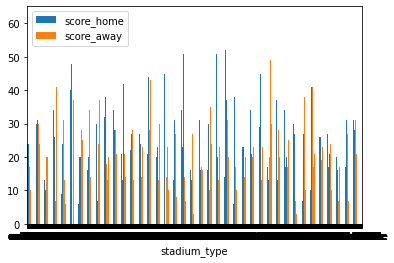

In [56]:
df.plot.bar(x='stadium_type', y=['score_home', 'score_away'], rot=0);